# Setup

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime
from sklearn import model_selection, metrics  #to include metrics for evaluation 
from sklearn.model_selection import train_test_split
%matplotlib inline

# Fed funds rate data: add a column denoting rate changed or not from previous month

In [39]:
ffr_df = pd.read_csv('fedfundsrates/fed_funds_target_rates_Dec2018_Sep1982.csv')

In [40]:
# Check if it renders correctly
ffr_df.head()

,DATE,DFEDTAR_20081215
0,9/27/82,10.25
1,9/28/82,10.25
2,9/29/82,10.25
3,9/30/82,10.25
4,10/1/82,10.00


In [41]:
# Info about the data
ffr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9587 entries, 0 to 9586
Data columns (total 2 columns):
DATE                9587 non-null object
DFEDTAR_20081215    9587 non-null float64
dtypes: float64(1), object(1)
memory usage: 149.9+ KB


In [42]:
# Add a new column that denotes how much the rate changed from the previous month
ffr_df = pd.read_csv('fedfundsrates/fed_funds_target_rates_Dec2018_Sep1982.csv')
df = pd.DataFrame(ffr_df)
df['Diff'] = df['DFEDTAR_20081215'].diff(1)
df.head() 


,DATE,DFEDTAR_20081215,Diff
0,9/27/82,10.25,NaN
1,9/28/82,10.25,0.00
2,9/29/82,10.25,0.00
3,9/30/82,10.25,0.00
4,10/1/82,10.00,-0.25


In [43]:
# Add a new column to denote IF a rate
# changed based on the previous month
# 1 is changed; 0 is did not change
df['Changed'] = np.where(df['Diff']!=0.0000, 1, 0)
df.head()

,DATE,DFEDTAR_20081215,Diff,Changed
0,9/27/82,10.25,NaN,1
1,9/28/82,10.25,0.00,0
2,9/29/82,10.25,0.00,0
3,9/30/82,10.25,0.00,0
4,10/1/82,10.00,-0.25,1


In [44]:
# Modify date string to a timestamp and put into format %Y%m%d

# First remove the / then modify to date format %Y%m%d
df['DATE'] = df['DATE'].replace('/', '', regex=True)

# Put into date format m d Y
df.DATE = pd.to_datetime(df.DATE, format='%m%d%y')
df.head()

,DATE,DFEDTAR_20081215,Diff,Changed
0,1982-09-27,10.25,NaN,1
1,1982-09-28,10.25,0.00,0
2,1982-09-29,10.25,0.00,0
3,1982-09-30,10.25,0.00,0
4,1982-10-01,10.00,-0.25,1


In [45]:
# Change the 'DATE' column to lower case 'date' so it looks better
df.rename(columns={'DATE':'date'}, inplace=True)
df.head()

,date,DFEDTAR_20081215,Diff,Changed
0,1982-09-27,10.25,NaN,1
1,1982-09-28,10.25,0.00,0
2,1982-09-29,10.25,0.00,0
3,1982-09-30,10.25,0.00,0
4,1982-10-01,10.00,-0.25,1


In [46]:
# Set the index to 'date' column
df = df.set_index('date')
df.head()

,DFEDTAR_20081215,Diff,Changed
date,,,
1982-09-27,10.25,NaN,1
1982-09-28,10.25,0.00,0
1982-09-29,10.25,0.00,0
1982-09-30,10.25,0.00,0
1982-10-01,10.00,-0.25,1


In [47]:
# Sort rate df by the index (which is now set to 'date')
df = df.sort_index()
df.head(10)

,DFEDTAR_20081215,Diff,Changed
date,,,
1982-09-27,10.25,NaN,1
1982-09-28,10.25,0.00,0
1982-09-29,10.25,0.00,0
1982-09-30,10.25,0.00,0
1982-10-01,10.00,-0.25,1
1982-10-02,10.00,0.00,0
1982-10-03,10.00,0.00,0
1982-10-04,10.00,0.00,0
1982-10-05,10.00,0.00,0


# Text data: Create a dataframe that includes the cleaned text doc content and adds a column for the date of the document taken from the file name

In [48]:
# Get a list of filenames from the local cleaned statements directory using glob library 
import glob
filenames = glob.glob('statements/statements.clean/*.txt')

# Initialize an empty list
# Then loop through the file list, and create a dictionary with the file dates and content
records = []
for filename in filenames:   
    data = open(filename).read()
    date = filename.split('/')[-1].split('.')[-2]
    record = {'filedate':date,'document':data}
    records.append(record)

In [49]:
docdf = pd.DataFrame(records)
docdf.head()

,document,filedate
0,fomc decid today rais target fedfundsr bas poi...,20051213
1,fomc meet today decid low target fedfundsr bas...,20010515
2,fomc decid today rais target fedfundsr bas poi...,20041214
3,fomc decid today leav target fedfundsr unchang...,19991005
4,fomc meet today decid maintain ex stant monet ...,20001219


In [50]:
# Modify filedate string to a timestamp
docdf.filedate = pd.to_datetime(docdf.filedate, format='%Y%m%d')
docdf.head()

,document,filedate
0,fomc decid today rais target fedfundsr bas poi...,2005-12-13
1,fomc meet today decid low target fedfundsr bas...,2001-05-15
2,fomc decid today rais target fedfundsr bas poi...,2004-12-14
3,fomc decid today leav target fedfundsr unchang...,1999-10-05
4,fomc meet today decid maintain ex stant monet ...,2000-12-19


In [51]:
# Set the index of docdf to the filedate column
docdf = docdf.set_index('filedate')
docdf.head()

,document
filedate,
2005-12-13,fomc decid today rais target fedfundsr bas poi...
2001-05-15,fomc meet today decid low target fedfundsr bas...
2004-12-14,fomc decid today rais target fedfundsr bas poi...
1999-10-05,fomc decid today leav target fedfundsr unchang...
2000-12-19,fomc meet today decid maintain ex stant monet ...


In [52]:
# Sort docdf by the index (which is now set to filedate)
docdf = docdf.sort_index()
docdf.head(10)

,document
filedate,
1999-05-18,federalreserv releas follow stat today fomc me...
1999-06-30,fomc today vot rais target fedfundsr bas point...
1999-08-24,fomc today vot rais target fedfundsr bas point...
1999-10-05,fomc decid today leav target fedfundsr unchang...
1999-11-16,fomc today vot rais target fedfundsr bas point...
1999-12-21,fomc mad chang today target fedfundsr bas on a...
2000-02-02,fomc vot today rais target fedfundsr bas point...
2000-03-21,fomc vot today rais target fedfundsr bas point...
2000-05-16,fomc vot today rais target fedfundsr bas point...


In [53]:
# Indicate if a rate changed within x days (try 7?) after a document is published, 
# by merging the rate and content df's
tol = pd.Timedelta('7 day')
change_df = pd.merge_asof(left=docdf,right=df,right_index=True,left_index=True,direction='nearest',tolerance=tol)
change_df.head(100)

,document,DFEDTAR_20081215,Diff,Changed
filedate,,,,
1999-05-18,federalreserv releas follow stat today fomc me...,4.75,0.00,0
1999-06-30,fomc today vot rais target fedfundsr bas point...,5.00,0.25,1
1999-08-24,fomc today vot rais target fedfundsr bas point...,5.25,0.25,1
1999-10-05,fomc decid today leav target fedfundsr unchang...,5.25,0.00,0
1999-11-16,fomc today vot rais target fedfundsr bas point...,5.50,0.25,1
1999-12-21,fomc mad chang today target fedfundsr bas on a...,5.50,0.00,0
2000-02-02,fomc vot today rais target fedfundsr bas point...,5.75,0.25,1
2000-03-21,fomc vot today rais target fedfundsr bas point...,6.00,0.25,1
2000-05-16,fomc vot today rais target fedfundsr bas point...,6.50,0.50,1


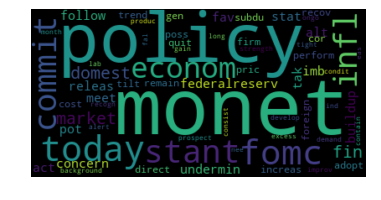

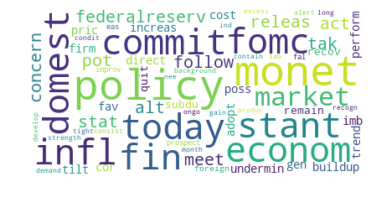

There are 28760 words in the combination of all documents.


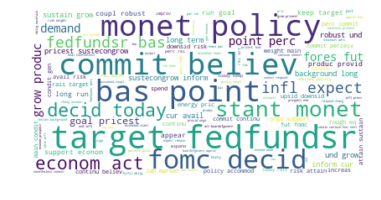

In [54]:
# EDA using WordCloud
# imports 
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline                                                                                      

# Start with one document
text = docdf.document[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("images/first_doc_allwords_cloud.png")

# Make it look better
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("images/first_doc_cloud_100words.png")

# Combine all documents into a single word cloud
text = " ".join(review for review in docdf.document) # Need to update words here
print ("There are {} words in the combination of all documents.".format(len(text)))

# Create stopword list:
# Skip this for now need to figure out which stopwords if needed
# stopwords = set(STOPWORDS)
# stopwords.update(["stopone", "stoptwo", "stopthree", "stopfour", "stopfive"])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)
# When stopwords added change to this: wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("images/all_doc_cloud.png")

# Let's explore the data more: EDA and some statistics

In [55]:
mean = ffr_df.mean()

In [56]:
ffr_df.median()

DFEDTAR_20081215    5.25
Diff                0.00
Changed             0.00
dtype: float64

In [57]:
ffr_df.min()

DATE                1982-09-27 00:00:00
DFEDTAR_20081215                 0.0125
Diff                            -0.9875
Changed                               0
dtype: object

In [58]:
ffr_df.max()

DATE                2018-12-20 00:00:00
DFEDTAR_20081215                   11.5
Diff                              1.125
Changed                               1
dtype: object

Text(0.5, 0, 'Rates')

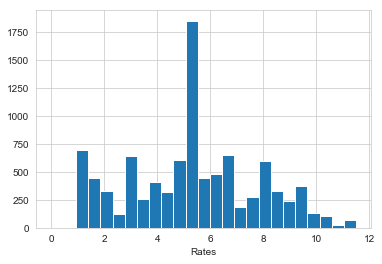

In [59]:
# TO DO: Nice to have lines noting the mean etc. stats we did above
# Plot a histogram of the rates
plt.hist(ffr_df['DFEDTAR_20081215'], edgecolor = 'white', bins=25)
plt.xlabel('Rates')

Text(0, 0.5, 'Rate (In Percent)')

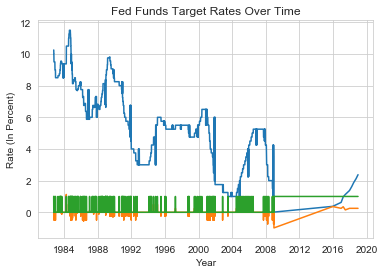

In [70]:
import seaborn as sns
sns.set_style("whitegrid")
plt.plot(df)
plt.title("Fed Funds Target Rates Over Time")
plt.xlabel("Year")
plt.ylabel("Rate (In Percent)")

In [83]:
# TO DO: FIXTHISLATER could be a useful feature to compare number of words in docs to see if length
# is a predictor of rate change i.e. they talk a lot to justify a change, or talk little if minds made up. 
# Count words in each row of documents in the content df and save to a new column
# dataset = pd.DataFrame([['change_df']], columns=['document'] )

# from collections import Counter
# dataset['words_in_doc'] = dataset.document.apply(lambda x: Counter(x.split(' ')))
# dataset


,document,words_in_doc
0,change_df,{'change_df': 1}


In [103]:
# How many times did rates change during this period?
Total = change_df['Changed'].sum()
print(Total)

27


Text(0, 0.5, 'Count of Change Occurances')

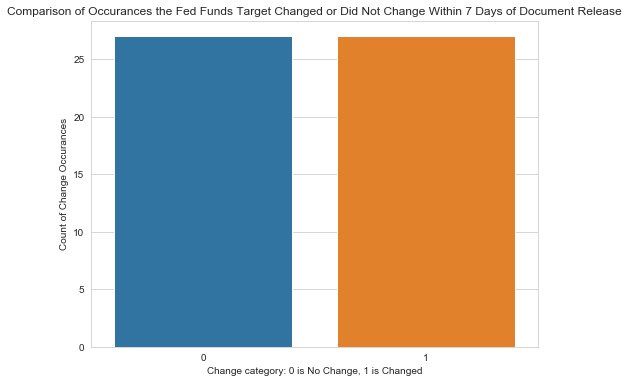

In [117]:
# Visual of how often rates changed within 7 days of doc being released, versus did not change
sns.countplot(change_df['Changed']);
plt.title("Comparison of Occurances the Fed Funds Target Changed or Did Not Change Within 7 Days of Document Release")
plt.xlabel("Change category: 0 is No Change, 1 is Changed")
plt.ylabel("Count of Change Occurances")

In [129]:
# TO DO: determine whether to keep this one or the one below, they use different df's for the analysis
# Determine the top 20 most common words and display what they are; this is from the merged df
from sklearn.feature_extraction.text import CountVectorizer
count_df = pd.DataFrame(change_df)
cv = CountVectorizer(max_features=20)
cv.fit(change_df['document'])
results = cv.transform(change_df['document'])
print(results.shape)
features = cv.get_feature_names()
df_res = pd.DataFrame(results.toarray(), columns=features)
df_res.info()

(54, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 20 columns):
accommod     54 non-null int64
act          54 non-null int64
believ       54 non-null int64
commit       54 non-null int64
continu      54 non-null int64
decid        54 non-null int64
econom       54 non-null int64
fedfundsr    54 non-null int64
fomc         54 non-null int64
grow         54 non-null int64
infl         54 non-null int64
long         54 non-null int64
perc         54 non-null int64
policy       54 non-null int64
pricest      54 non-null int64
produc       54 non-null int64
remain       54 non-null int64
risk         54 non-null int64
target       54 non-null int64
today        54 non-null int64
dtypes: int64(20)
memory usage: 8.5 KB


In [130]:
# Determine the top 20 most common words and display what they are; this is from the original docdf
from sklearn.feature_extraction.text import CountVectorizer
count_df_o = pd.DataFrame(docdf)
cv = CountVectorizer(max_features=20)
cv.fit(docdf['document'])
results = cv.transform(change_df['document'])
print(results.shape)
features = cv.get_feature_names()
df_res_o = pd.DataFrame(results.toarray(), columns=features)
df_res_o.info()

(54, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 20 columns):
accommod     54 non-null int64
act          54 non-null int64
believ       54 non-null int64
commit       54 non-null int64
continu      54 non-null int64
decid        54 non-null int64
econom       54 non-null int64
fedfundsr    54 non-null int64
fomc         54 non-null int64
grow         54 non-null int64
infl         54 non-null int64
long         54 non-null int64
perc         54 non-null int64
policy       54 non-null int64
pricest      54 non-null int64
produc       54 non-null int64
remain       54 non-null int64
risk         54 non-null int64
target       54 non-null int64
today        54 non-null int64
dtypes: int64(20)
memory usage: 8.5 KB
